<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
data = df.round(decimals=3)

In [7]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.256,91.116,28.074,23.007,6.819,69.452,...,0.0,0.0,0.0,37.605,126.991,212.335,2.785,5992.896,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263,90.605,29.851,24.035,5.692,51.937,...,0.0,0.0,0.0,37.605,127.032,44.762,0.514,5869.312,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690,83.974,30.091,24.566,6.138,20.573,...,0.0,0.0,0.0,37.578,127.058,33.307,0.266,5863.556,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.240,96.484,29.705,23.326,5.650,65.727,...,0.0,0.0,0.0,37.645,127.022,45.716,2.535,5856.965,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174,90.155,29.114,23.486,5.735,107.966,...,0.0,0.0,0.0,37.551,127.135,35.038,0.505,5859.552,31.2,22.5


In [8]:

x = data[['station',  'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = data['Present_Tmax'].values

In [9]:
print(x)

[[ 1.    21.4   58.256 ...  2.785 29.1   21.2  ]
 [ 2.    21.6   52.263 ...  0.514 30.5   22.5  ]
 [ 3.    23.3   48.69  ...  0.266 31.1   23.9  ]
 ...
 [23.    24.2   44.952 ...  0.155 33.6   24.6  ]
 [24.    23.9   42.318 ...  0.222 32.6   24.4  ]
 [25.    24.1   40.501 ...  0.271 32.5   23.8  ]]


In [10]:
print(y)

[28.7 31.9 31.6 ... 29.9 29.8 29.7]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = ml.predict(x_test)
print(y_pred)

[30.51114074 31.07388842 26.89173802 ... 30.41716534 30.3237196
 29.78533986]


In [14]:
ml.predict([[1,21.4,	58.256,	91.116,	28.074,	23.007,	6.819	,69.452	,	0.234	,0.203,0.161,0.130,0,0,0,37.605,	126.991	,212.335,	2.785,	5992.896,	29.1,	21.2]])

array([1085.51339536])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6849287439730898

Text(0, 0.5, 'Predicted')

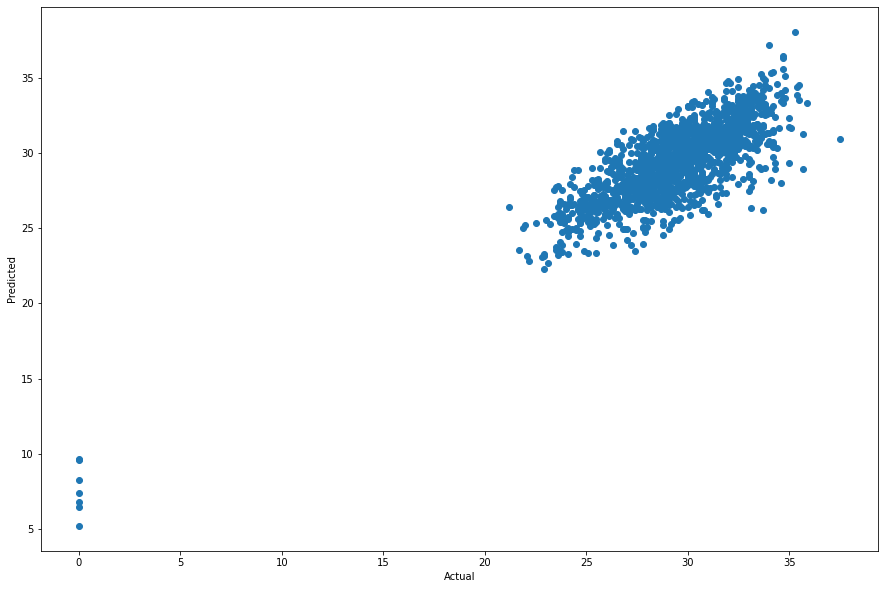

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [17]:
pred_val = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference':y_test-y_pred})
pred_val[0:20]

,Actual Value,Predicted Value,Difference
0,29.5,30.511141,-1.011141
1,29.3,31.073888,-1.773888
2,27.6,26.891738,0.708262
3,30.8,29.545203,1.254797
4,30.8,28.161601,2.638399
5,30.2,30.526811,-0.326811
6,32.6,30.987582,1.612418
7,30.0,29.624211,0.375789
8,31.1,27.641110,3.458890
9,29.9,31.555478,-1.655478
